In [1]:
# fetching dataset
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,brier_score_loss,average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import warnings
from sklearn.exceptions import ConvergenceWarning
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from collections import Counter
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


In [2]:
def show(img):
  some_digit_image=img.reshape(28,28)
  plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,interpolation='nearest')
  plt.axis("off")
  plt.show()

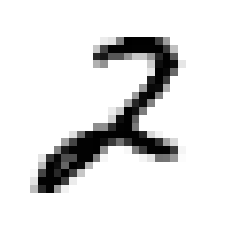

In [3]:
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36001]
show(some_digit)

In [4]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train.iloc[shuffle_index], y_train[shuffle_index]

y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [5]:
clf = LogisticRegression(tol=0.1)
clf.fit(x_train.values, y_train)
a = cross_val_score(clf, x_train.values, y_train, cv=3, scoring="accuracy")
print(f"Mean of CV of Linear Regression: {a.mean()}")
print(f"Accuracy of Linear regression  : {clf.score(x_test.values,y_test)}")

Mean of CV of Linear Regression: 0.8715
Accuracy of Linear regression  : 0.8665


In [6]:
model = GaussianNB()
model.fit(x_train.values,y_train)
a = cross_val_score(model, x_train.values, y_train, cv=3, scoring="accuracy")
print(f"Mean of CV of Naive Bayes      : {a.mean()}")
print(f"Accuracy of Naive Bayes        : {model.score(x_test.values,y_test)}")

Mean of CV of Naive Bayes      : 0.594
Accuracy of Naive Bayes        : 0.578


In [7]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train.values,y_train)
a = cross_val_score(neigh, x_train.values, y_train, cv=3, scoring="accuracy")
print(f"Mean of CV of Kneighbors       : {a.mean()}")
print(f"Accuracy of KNeighbors         : {neigh.score(x_test.values,y_test)}")

Mean of CV of Kneighbors       : 0.9345
Accuracy of KNeighbors         : 0.9363


In [8]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train.values, y_train)
a = cross_val_score(tree, x_train.values, y_train, cv=3, scoring="accuracy")
print(f"Mean of CV of Decision Tree    : {a.mean()}")
print(f"Accuracy of Decision Tree      : {tree.score(x_test.values, y_test)}")

Mean of CV of Decision Tree    : 0.7786666666666666
Accuracy of Decision Tree      : 0.7842


In [9]:
svc = svm.SVC(kernel='rbf')
svc.fit(x_train.values, y_train)
a = cross_val_score(svc, x_train.values, y_train, cv=3, scoring="accuracy")
print(f"Mean of CV of SVM              : {a.mean()}")
print(f"Accuracy of SVM                : {svc.score(x_test.values, y_test)}")

Mean of CV of SVM              : 0.9511666666666666
Accuracy of SVM                : 0.953


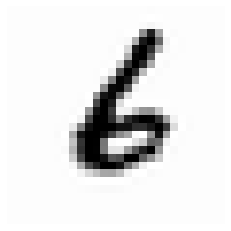

6


In [10]:
def pred(img_array,plot):
  img_pil = Image.fromarray(img_array)
  img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))
  img_array = (img_28x28.flatten())
  img_array=img_array.reshape(1, -1)
  p=svc.predict(img_array)[0]
  if plot : show(img_array)
  return p
img_array=cv2.imread('/content/6.jfif',cv2.IMREAD_GRAYSCALE)
img_array= cv2.bitwise_not(img_array)
print(pred(img_array,True))

(390, 732, 3)


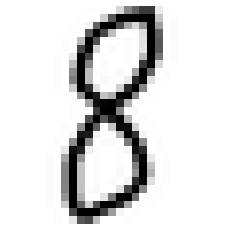

x,y,w,h: 139 281 63 63 5


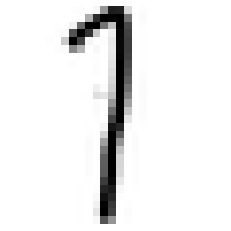

x,y,w,h: 426 280 63 63 1


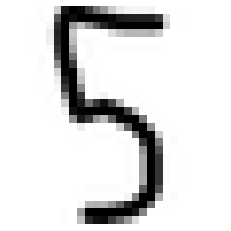

x,y,w,h: 303 278 49 49 5


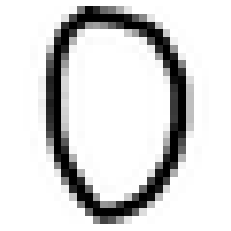

x,y,w,h: 512 202 52 52 0


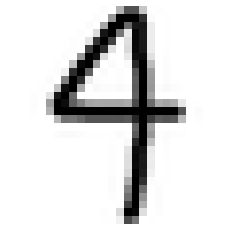

x,y,w,h: 207 151 52 52 4


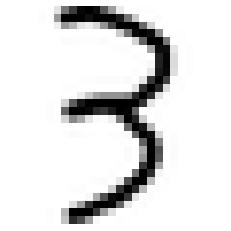

x,y,w,h: 413 124 54 54 3


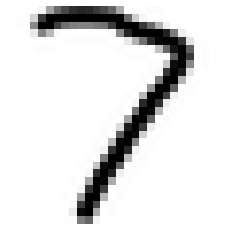

x,y,w,h: 625 101 46 46 7


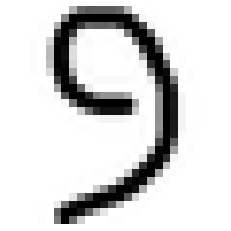

x,y,w,h: 54 100 46 46 5


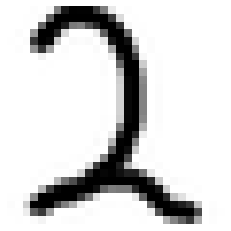

x,y,w,h: 259 47 41 41 2


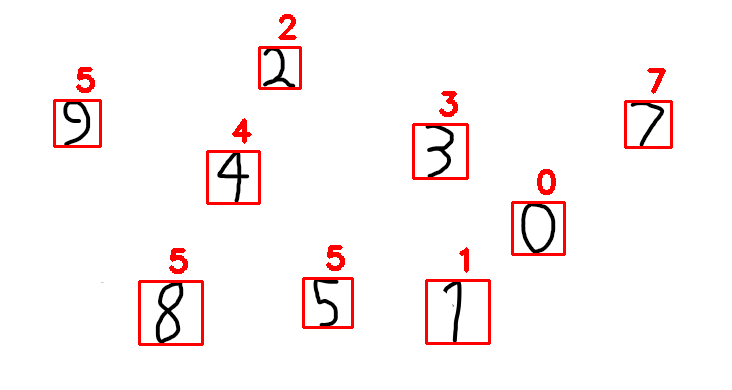

In [11]:
# from google.colab import files
# import io
# uploaded = files.upload()
img = cv2.imread('/content/test.png')
print(img.shape)
# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

# threshold
_,thresh = cv2.threshold(gray,100,200,cv2.THRESH_BINARY)

# get contours
result = img.copy()
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    if h<10 or w<5:continue
    w=max(w,28)
    h=max(h,28)
    if w < h:
      x-=(h-w)//2
      w=h
    else:
      y-=(w-h)//2
      h=w
    new=gray.copy()[y:y+h,x:w+x]
    c=pred(new,True)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(result,str(c),(x+w//2-2,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
    print("x,y,w,h:",x,y,w,h,c)
cv2_imshow(result)